Text(0.5, 0, 'step number')

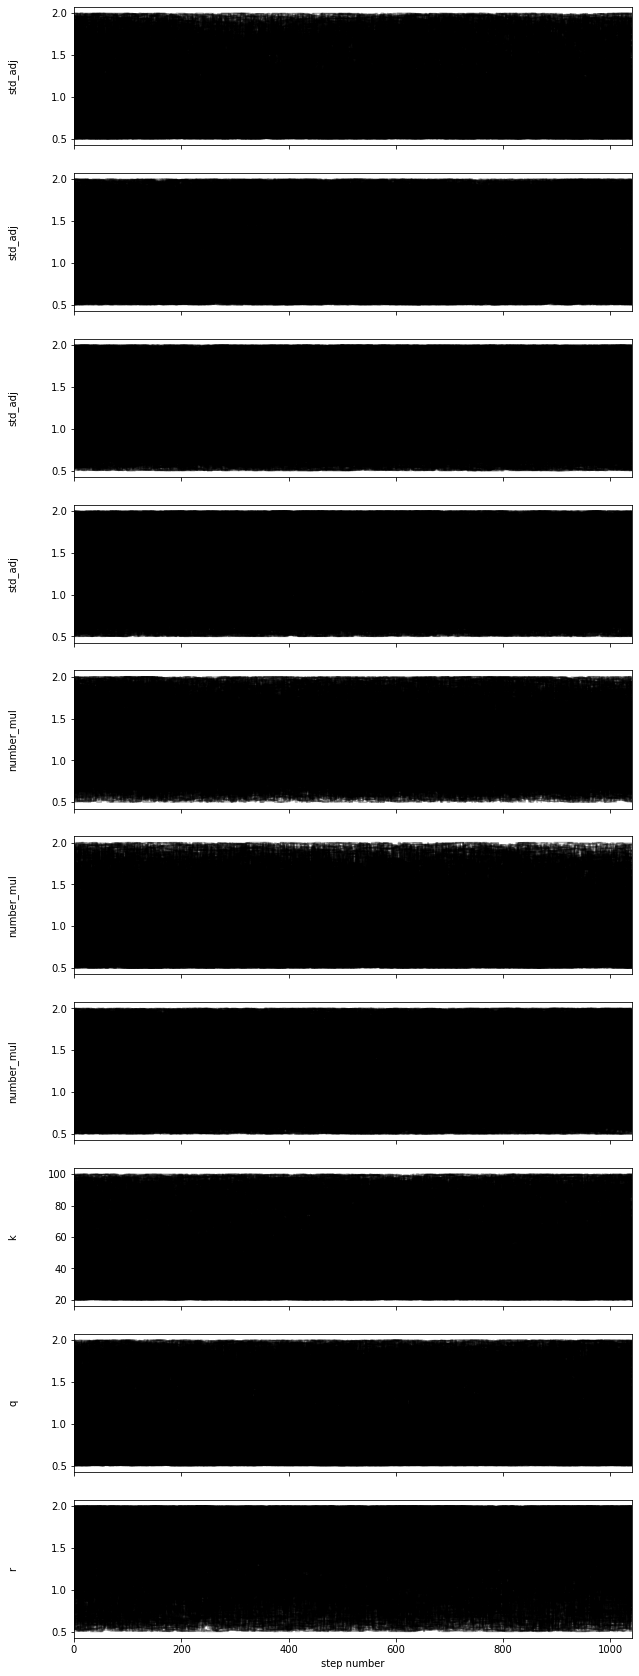

In [9]:
import numpy as np
import emcee
import matplotlib.pyplot as plt

def lnprob(theta):
    return 0
#random position
pos = np.ones((1024, 10))
nwalkers, ndim = pos.shape
filename = "Best_fit_knn.h5"
knn_backend = emcee.backends.HDFBackend(filename, name="Best_fit_knn")
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, backend=knn_backend)
#plot
fig, axes = plt.subplots(10, figsize=(10, 30), sharex=True)
samples = sampler.get_chain(discard=15000)
labels = ['std_adj','std_adj','std_adj','std_adj','number_mul','number_mul','number_mul','k','q','r']

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number")

In [10]:
np.max(sampler.get_log_prob()), np.argmax(sampler.get_log_prob())

(-30.03044604469316, 8082102)

In [11]:
sampler.iteration

16040

In [12]:
sampler.get_autocorr_time(tol=0)

array([604.78415682, 626.45641   , 595.4951025 , 605.36354465,
       604.58504565, 575.77469934, 590.26894431, 648.04104936,
       608.97878813, 626.55199768])

In [13]:
sampler.get_chain(discard=0, thin=1, flat=True)[np.argmax(sampler.get_log_prob())]

array([ 0.91158577,  1.03691   ,  1.18240536,  1.5094504 ,  0.76005638,
        0.90478132,  0.6032742 , 23.56535226,  0.97658515,  1.40117865])